<a href="https://colab.research.google.com/github/juank2572/codigo-LSTM-MultivariadoJuan-Carlos-Anaya-/blob/main/PREPROCESAMIENTO_DATOS_MULTIVARIADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


#Se abrirá un enlace para que autorices el acceso a tu cuenta de Google.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Cargar el archivo Excel desde tu Google Drive (asegúrate de tener la ruta correcta)
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/DATA_ENERGIA_MULTIVARIADO.xlsx'
df = pd.read_excel(ruta_archivo)

# Ver las primeras filas para inspeccionar los datos
df.head()



,FECHA,HORA,PRECIO BOLSA ($/KWH),CONTRATOS DE ENERGIA,GENERACION (KW),CONSUMO COMBUSTIBLE MBTU
0,2015-01-01,00:00:00,184.210107,6042690.71,57263.056792,31966.280596
1,2015-01-01,01:00:00,178.210107,5845780.88,57129.884020,31966.280596
2,2015-01-01,02:00:00,178.210107,5671809.30,52588.497925,31966.280596
3,2015-01-01,03:00:00,178.210107,5591974.57,51389.254952,31966.280596
4,2015-01-01,04:00:00,178.210107,5587617.59,50084.790190,31966.280596


In [ ]:
# Eliminar espacios extra en los nombres de las columnas
df.columns = df.columns.str.strip()

# Verificar los nombres de las columnas después de quitar los espacios
print(df.columns)



Index(['FECHA', 'HORA', 'PRECIO BOLSA  ($/KWH)', 'CONTRATOS DE ENERGIA',
       'GENERACION (KW)', 'CONSUMO  COMBUSTIBLE MBTU'],
      dtype='object')


Para evitar posibles errores o inconsistencias en el uso de las columnas, se aplica el comando df.columns = df.columns.str.strip() para eliminar cualquier espacio extra que pueda haber quedado en los nombres de las columnas.
Finalmente, se imprime el nombre de las columnas utilizando print(df.columns)para asegurarse de que los nombres de las columnas han sido correctamente limpiados, eliminando los espacios innecesarios.

In [ ]:
# Unir las columnas 'FECHA' y 'HORA' en una nueva columna 'Datetime'
df['Datetime'] = pd.to_datetime(df['FECHA'].astype(str) + ' ' + df['HORA'].astype(str), format='mixed', errors='coerce')

# Verificar si hubo errores en la conversión
errores = df[df['Datetime'].isna()]
print("Filas con error en conversión de fecha:", len(errores))


Filas con error en conversión de fecha: 0


La inspección inicial sugiere que los datos están organizados por fecha y hora, y que se requieren transformaciones para crear una marca de tiempo unificada y para seleccionar las características más adecuadas para el modelado. Para ello usamos: df['Datetime'] = pd.to_datetime(df['FECHA'].astype(str) + ' ' + df['HORA'].astype(str), format='mixed', errors='coerce'). Posteriormente se verifica si hubo errores en la conversión con:
errores = df[df['Datetime'].isna()] y
print("Filas con error en conversión de fecha:", len(errores))


In [ ]:
#IMPRIMIR LAS 28 PRIMERAS FILAS
df.head(28)

,FECHA,HORA,PRECIO BOLSA ($/KWH),CONTRATOS DE ENERGIA,GENERACION (KW),CONSUMO COMBUSTIBLE MBTU,Datetime
0,2015-01-01,00:00:00,184.210107,6042690.71,57263.056792,31966.280596,2015-01-01 00:00:00
1,2015-01-01,01:00:00,178.210107,5845780.88,57129.884020,31966.280596,2015-01-01 01:00:00
2,2015-01-01,02:00:00,178.210107,5671809.30,52588.497925,31966.280596,2015-01-01 02:00:00
3,2015-01-01,03:00:00,178.210107,5591974.57,51389.254952,31966.280596,2015-01-01 03:00:00
4,2015-01-01,04:00:00,178.210107,5587617.59,50084.790190,31966.280596,2015-01-01 04:00:00
5,2015-01-01,05:00:00,178.210107,5602378.31,49229.619615,31966.280596,2015-01-01 05:00:00
6,2015-01-01,06:00:00,178.210107,5496181.47,44903.599904,31966.280596,2015-01-01 06:00:00
7,2015-01-01,07:00:00,111.699107,5416719.95,45472.389320,31966.280596,2015-01-01 07:00:00
8,2015-01-01,08:00:00,178.210107,5878466.88,47117.387404,31966.280596,2015-01-01 08:00:00
9,2015-01-01,09:00:00,178.210107,6101920.94,50522.413069,31966.280596,2015-01-01 09:00:00


In [ ]:
#-------------------------------------------
#SELECCIÓN Y FILTRADO DE COLUMNAS RELEVANTES
#-------------------------------------------

#Eliminar espacios extra en los nombres de las columnas
df.columns = df.columns.str.strip()

# Unir las columnas 'FECHA' y 'HORA' en una nueva columna 'Datetime'
# Convert 'FECHA' and 'HORA' to string before concatenation to ensure compatibility
df['Datetime'] = pd.to_datetime(df['FECHA'].astype(str) + ' ' + df['HORA'].astype(str), format='mixed', errors='coerce')

# Verificar si hubo errores en la conversión
errores = df[df['Datetime'].isna()]
print("Filas con error en conversión de fecha:", len(errores))

# Renombrar la columna de precios (por ejemplo, 'PRECIO BOLSA  ($/KWH)' a 'value')
df.rename(columns={'PRECIO BOLSA  ($/KWH)': 'value'}, inplace=True)

# Crear un DataFrame final con 'Datetime' y todas las demás columnas relevantes
df_final = df[['Datetime', 'value', 'CONTRATOS DE ENERGIA', 'GENERACION (KW)', 'CONSUMO  COMBUSTIBLE MBTU']]

# Mostrar las primeras filas del DataFrame final
print(df_final.head())



Filas con error en conversión de fecha: 0
             Datetime       value  CONTRATOS DE ENERGIA  GENERACION (KW)  \
0 2015-01-01 00:00:00  184.210107            6042690.71     57263.056792   
1 2015-01-01 01:00:00  178.210107            5845780.88     57129.884020   
2 2015-01-01 02:00:00  178.210107            5671809.30     52588.497925   
3 2015-01-01 03:00:00  178.210107            5591974.57     51389.254952   
4 2015-01-01 04:00:00  178.210107            5587617.59     50084.790190   

   CONSUMO  COMBUSTIBLE MBTU  
0               31966.280596  
1               31966.280596  
2               31966.280596  
3               31966.280596  
4               31966.280596  


En esta sección se depuran los nombres de las columnas eliminando espacios en blanco al inicio o al final, lo que evita errores al referenciarlas y estandariza el esquema para las etapas posteriores de análisis, una práctica básica en limpieza de datos para asegurar consistencia nominal. Luego, se construye un sello temporal unificado en la columna Datetime a partir de FECHA y HORA: ambas variables se convierten explícitamente a texto para garantizar una concatenación segura y, acto seguido, se aplica el conversor de fechas de pandas con format="mixed" y errors="coerce"; estos parámetros permiten aceptar formatos heterogéneos sin fallar y marcan como NaT las entradas inválidas, de modo que la ejecución no se interrumpe y los registros problemáticos pueden auditarse después, lo cual es especialmente útil cuando se integran fuentes con formatos de fecha variados. Inmediatamente, se realiza un control de calidad contando cuántas filas fallaron en la conversión (Datetime nulo) e imprimiendo ese total, con el fin de cuantificar la magnitud del problema y decidir si se requieren correcciones o descartes antes de continuar, manteniendo trazabilidad del preprocesamiento temporal. A continuación, se normaliza el nombre de la columna de precios renombrándola a value; esta estandarización simplifica las referencias en el pipeline y favorece la compatibilidad con utilidades que esperan una convención de nombres uniforme, aplicándose en sitio para que el DataFrame quede inmediatamente actualizado. Seguidamente, se define el conjunto de trabajo df_final seleccionando, y ordenando, las columnas relevantes: el sello temporal Datetime, la variable objetivo value y las covariables energéticas; esta selección explícita garantiza que avancen solo los atributos necesarios y en el orden previsto por las etapas de modelado o visualización, reduciendo ruido y errores por columnas irrelevantes. Por último, se muestran las primeras filas del DataFrame final para una verificación rápida de estructura, tipos y valores, lo que permite detectar a simple vista anomalías producidas por las transformaciones antes de pasar a pasos más costosos como el escalado o la generación de ventanas temporales.



In [ ]:
#IMPRIMIR LAS 28 PRIMERAS FILAS
df_final.head(28)

,Datetime,value,CONTRATOS DE ENERGIA,GENERACION (KW),CONSUMO COMBUSTIBLE MBTU
0,2015-01-01 00:00:00,184.210107,6042690.71,57263.056792,31966.280596
1,2015-01-01 01:00:00,178.210107,5845780.88,57129.884020,31966.280596
2,2015-01-01 02:00:00,178.210107,5671809.30,52588.497925,31966.280596
3,2015-01-01 03:00:00,178.210107,5591974.57,51389.254952,31966.280596
4,2015-01-01 04:00:00,178.210107,5587617.59,50084.790190,31966.280596
5,2015-01-01 05:00:00,178.210107,5602378.31,49229.619615,31966.280596
6,2015-01-01 06:00:00,178.210107,5496181.47,44903.599904,31966.280596
7,2015-01-01 07:00:00,111.699107,5416719.95,45472.389320,31966.280596
8,2015-01-01 08:00:00,178.210107,5878466.88,47117.387404,31966.280596
9,2015-01-01 09:00:00,178.210107,6101920.94,50522.413069,31966.280596


In [ ]:
#-------------------------------
#ESTIMACIÓN DE VALORES FALTANTES
#--------------------------------

df_final.isnull().sum()


,0
Datetime,0
value,0
CONTRATOS DE ENERGIA,0
GENERACION (KW),6
CONSUMO COMBUSTIBLE MBTU,0


In [ ]:
# Rellenar las celdas vacías con interpolación lineal
df_final['GENERACION (KW)'] = df_final['GENERACION (KW)'].interpolate(method='linear')

# Verificar si se rellenaron las celdas
print(df_final.isnull().sum())


Datetime                     0
value                        0
CONTRATOS DE ENERGIA         0
GENERACION (KW)              0
CONSUMO  COMBUSTIBLE MBTU    0
dtype: int64


<ipython-input-9-e91a3ff059f3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['GENERACION (KW)'] = df_final['GENERACION (KW)'].interpolate(method='linear')


La interpolación lineal es una opción efectiva porque preserva las tendencias y variaciones naturales de la serie original, lo que hace que los valores sustituidos se ajusten mejor a los patrones temporales de los datos. Para realizarla se utiliza:

df\_final['GENERACION (kW)'] = df\_final['GENERACION (kW)'].interpolate(method='linear')

Finalmente, se verifica si las celdas han sido correctamente sustituidas con el siguiente comando:
df\_final.isnull().sum()

Este paso asegura que todos los valores faltantes hayan sido sustituidos de manera efectiva utilizando la interpolación lineal, y no quedan valores nulos en la columna.

In [ ]:
# ------------------------------------------------------
#EXPLORACION DE VALORES UNICOS Y CEROS EN GENERACION (KW)
# ------------------------------------------------------
#Verificar los valores únicos en la columna 'GENERACION (KW)'
valores_unicos = df_final['GENERACION (KW)'].unique()
print("Valores únicos en 'GENERACION (KW)':", valores_unicos)

# Filtrar los registros donde 'GENERACION (KW)' es cero
valores_cero = df_final[df_final['GENERACION (KW)'] == 0]
print("Filas con valor cero en 'GENERACION (KW)':", len(valores_cero))

# Ver las primeras filas con valor cero para inspeccionar más
print(valores_cero.head())


Valores únicos en 'GENERACION (KW)': [57263.05679245 57129.88401961 52588.49792453 ... 28870.43375817
 26955.11611111 25161.42091503]
Filas con valor cero en 'GENERACION (KW)': 23
                 Datetime       value  CONTRATOS DE ENERGIA  GENERACION (KW)  \
26448 2018-01-07 00:00:00  132.560013            5974436.81              0.0   
26449 2018-01-07 01:00:00  132.560013            5812113.27              0.0   
26450 2018-01-07 02:00:00  127.460013            5735436.58              0.0   
26451 2018-01-07 03:00:00  127.460013            5702082.52              0.0   
26452 2018-01-07 04:00:00  127.460013            5780378.13              0.0   

       CONSUMO  COMBUSTIBLE MBTU  
26448                26228.62164  
26449                26228.62164  
26450                26228.62164  
26451                26228.62164  
26452                26228.62164  


valores_unicos = df_final['GENERACION (KW)'].unique()
Extrae y devuelve un arreglo con los valores únicos que aparecen en la serie GENERACION (KW), sin ordenar y en el orden de primera aparición; esto permite detectar rápidamente codificaciones inesperadas, ceros o valores atípicos antes de decidir un tratamiento de calidad de datos.

print("Valores únicos en 'GENERACION (KW)':", valores_unicos)
Muestra en consola el conjunto de valores distintos para documentar la auditoría exploratoria y facilitar la revisión manual de rangos o categorías presentes en la columna analizada.

valores_cero = df_final[df_final['GENERACION (KW)'] == 0]
Filtra el DataFrame para conservar únicamente las filas donde GENERACION (KW) es igual a cero, produciendo un subconjunto que concentra los casos potencialmente no informativos o anómalos que podrían requerir corrección o exclusión en el preprocesamiento.

print("Filas con valor cero en 'GENERACION (KW)':", len(valores_cero))
Informa la magnitud del problema cuantificando cuántos registros tienen valor cero, lo que ayuda a decidir la estrategia de tratamiento y a dejar trazabilidad del hallazgo en el flujo de trabajo.

print(valores_cero.head())
Muestra las primeras filas del subconjunto con ceros para inspección rápida del contexto (fechas, otras variables asociadas) y corroborar si los ceros corresponden a fallos de registro, cortes operativos u otras causas; head imprime por defecto las primeras 5 filas para una revisión ágil.

In [ ]:


import numpy as np # Importa la librería numpy y asígnale el alias 'np'

# Identificar las filas con ceros en 'GENERACION (KW)'
mask = df_final['GENERACION (KW)'] == 0

# Reemplazar los ceros con NaN
df_final.loc[mask, 'GENERACION (KW)'] = np.nan

# Aplicar interpolación lineal para rellenar los NaN (originalmente ceros)
df_final['GENERACION (KW)'] = df_final['GENERACION (KW)'].interpolate(method='linear')

# Verificar si se rellenaron las celdas con ceros
print(df_final.isnull().sum())


Datetime                     0
value                        0
CONTRATOS DE ENERGIA         0
GENERACION (KW)              0
CONSUMO  COMBUSTIBLE MBTU    0
dtype: int64


<ipython-input-11-a5fa3fafb7da>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['GENERACION (KW)'] = df_final['GENERACION (KW)'].interpolate(method='linear')


La importación de numpy habilita operaciones numéricas vectorizadas que se usarán para introducir NaN de forma eficiente en el DataFrame.

Posteriormente se localiza los registros donde la generación es exactamente cero para tratarlos como huecos de información.
mask = df_final['GENERACION (KW)'] == 0 Construye una máscara booleana que vale True en las filas cuyo valor de GENERACION (KW) es 0, permitiendo seleccionar y modificar solo esos registros de manera vectorizada.

Los ceros se reinterpretan como faltantes para poder aplicar técnicas estándar de completado de series, como interpolación.
df_final.loc[mask, 'GENERACION (KW)'] = np.nan Usa la máscara para asignar NaN en GENERACION (KW) donde había ceros, marcando explícitamente esos puntos como valores faltantes reconocidos por pandas.

Para aplicar la inter´polación lineal, método de reconstrucción elegido, preservando continuidad temporal mediante una línea entre observaciones válidas adyacentes se usa:
df_final['GENERACION (KW)'] = df_final['GENERACION (KW)'].interpolate(method='linear') Rellena los NaN resultantes con interpolación lineal, estimando cada hueco como el punto en la recta entre el valor anterior y el siguiente, lo cual es apropiado para series con muestreo regular y evita escalones artificiales.

La validación posterior al completado para confirmar que ya no quedan faltantes en el DataFrame se realiza con:
print(df_final.isnull().sum()) Imprime el conteo de valores nulos por columna tras la interpolación para verificar que los huecos fueron resueltos y que la estructura está lista para las etapas siguientes del pipeline temporal.

In [ ]:
duplicados = df_final.duplicated()
print(f"🔍 Filas duplicadas encontradas: {duplicados.sum()}")

🔍 Filas duplicadas encontradas: 0


duplicados = df_final.duplicated() Calcula una Serie booleana que marca con True las filas duplicadas completas, lo cual ayuda a detectar registros repetidos que podrían sesgar análisis o entrenamiento de modelos.
print(f"- Filas duplicadas encontradas: {duplicados.sum()}") Reporta el número total de filas duplicadas encontradas para documentar la revisión de calidad de datos y decidir si se requiere eliminación de duplicados.

In [ ]:
# Verificar valores nulos y ceros
missing = df_final.isnull().sum()
zeros = (df_final == 0).sum()

# Mostrar los resultados
print("Valores Nulos:\n", missing)
print("\nValores Cero:\n", zeros)
#print("\nEstadísticas Básicas:\n", summary)

Valores Nulos:
 Datetime                     0
value                        0
CONTRATOS DE ENERGIA         0
GENERACION (KW)              0
CONSUMO  COMBUSTIBLE MBTU    0
dtype: int64

Valores Cero:
 Datetime                        0
value                           0
CONTRATOS DE ENERGIA         1826
GENERACION (KW)                 0
CONSUMO  COMBUSTIBLE MBTU       0
dtype: int64


missing = df_final.isnull().sum() Calcula el número de valores nulos por columna en df_final y lo almacena en missing, permitiendo cuantificar faltantes por variable.
zeros = (df_final == 0).sum() Cuenta cuántos ceros hay por columna comparando elemento a elemento con 0 y sumando por eje, útil para detectar ceros potencialmente no informativos.
print("Valores Nulos:\n", missing) Imprime el conteo de nulos por columna para documentar el diagnóstico de faltantes antes de cualquier corrección.
print("\nValores Cero:\n", zeros) Imprime el conteo de ceros por columna para dimensionar la magnitud de ceros en el dataset y decidir su tratamiento.


In [ ]:
import numpy as np

# Replace zeros with NaN to prepare for interpolation
df_final = df_final.replace(0, np.nan)

# Perform linear interpolation on all columns with missing values
for column in df_final.columns:
    if df_final[column].isnull().any():  # Check if the column has any missing values
        df_final[column] = df_final[column].interpolate(method='linear')

# Verify if null values have been filled
print(df_final.isnull().sum())

Datetime                     0
value                        0
CONTRATOS DE ENERGIA         0
GENERACION (KW)              0
CONSUMO  COMBUSTIBLE MBTU    0
dtype: int64


import numpy as np Importa NumPy y habilita np.nan para representar faltantes de forma estándar en operaciones vectorizadas.
df_final = df_final.replace(0, np.nan) Sustituye todos los ceros del DataFrame por NaN, preparándolo para técnicas de completado como la interpolación que operan sobre valores faltantes.
for column in df_final.columns: Itera por cada nombre de columna del DataFrame para aplicar lógicas de tratamiento columna a columna de forma sistemática.
if df_final[column].isnull().any(): Evalúa si la columna actual contiene al menos un NaN, condición para ejecutar el proceso de interpolación solo donde sea necesario.
df_final[column] = df_final[column].interpolate(method='linear') Reconstruye los valores faltantes de la columna por interpolación lineal, estimando cada hueco con el punto en la recta entre vecinos válidos adyacentes.
print(df_final.isnull().sum()) Vuelve a calcular e imprimir el número de nulos por columna para verificar que el procedimiento de reemplazo e interpolación eliminó los faltantes restantes.

In [ ]:
# Verificar valores nulos y ceros
missing = df_final.isnull().sum()
zeros = (df_final == 0).sum()

# Mostrar los resultados
print("Valores Nulos:\n", missing)
print("\nValores Cero:\n", zeros)
#print("\nEstadísticas Básicas:\n", summary)

Valores Nulos:
 Datetime                     0
value                        0
CONTRATOS DE ENERGIA         0
GENERACION (KW)              0
CONSUMO  COMBUSTIBLE MBTU    0
dtype: int64

Valores Cero:
 Datetime                     0
value                        0
CONTRATOS DE ENERGIA         0
GENERACION (KW)              0
CONSUMO  COMBUSTIBLE MBTU    0
dtype: int64


In [ ]:
# Estadísticas descriptivas del DataFrame
print(df_final.describe())


                            Datetime         value  CONTRATOS DE ENERGIA  \
count                          87648  87648.000000          8.764800e+04   
mean   2019-12-09 04:48:35.881708800    298.078735          9.093263e+06   
min              1900-01-01 00:00:00     46.791501          4.907331e+06   
25%              2017-07-01 23:45:00    118.000537          7.848719e+06   
50%              2019-12-31 23:30:00    189.694172          8.976849e+06   
75%              2022-07-01 23:15:00    356.250000          1.013888e+07   
max              2024-12-31 23:00:00   2821.520551          1.424540e+07   
std                              NaN    294.341108          1.652232e+06   

       GENERACION (KW)  CONSUMO  COMBUSTIBLE MBTU  
count     87648.000000               87648.000000  
mean      48319.692723               14695.574530  
min       20925.682547                3079.845254  
25%       39522.863258                7327.522756  
50%       47688.282785               11898.793708  
75%

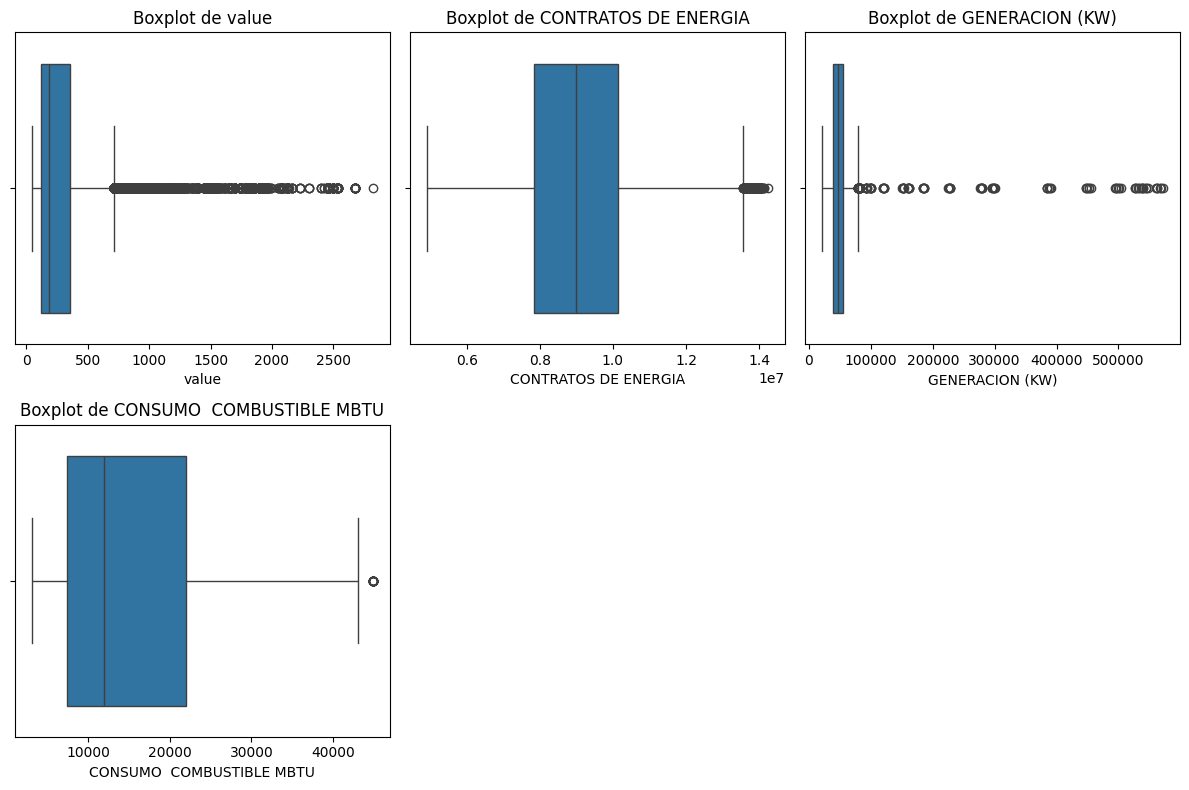

In [ ]:
import matplotlib.pyplot as plt  # Importa matplotlib.pyplot con el alias 'plt'
import seaborn as sns  # Importa seaborn con el alias 'sns'

# Graficar un boxplot para cada columna individualmente
plt.figure(figsize=(12, 8))

# Para cada columna numérica en el DataFrame
for i, columna in enumerate(df_final.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(2, 3, i+1)  # Ajusta el número de filas y columnas según el número de columnas
    sns.boxplot(x=df_final[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()

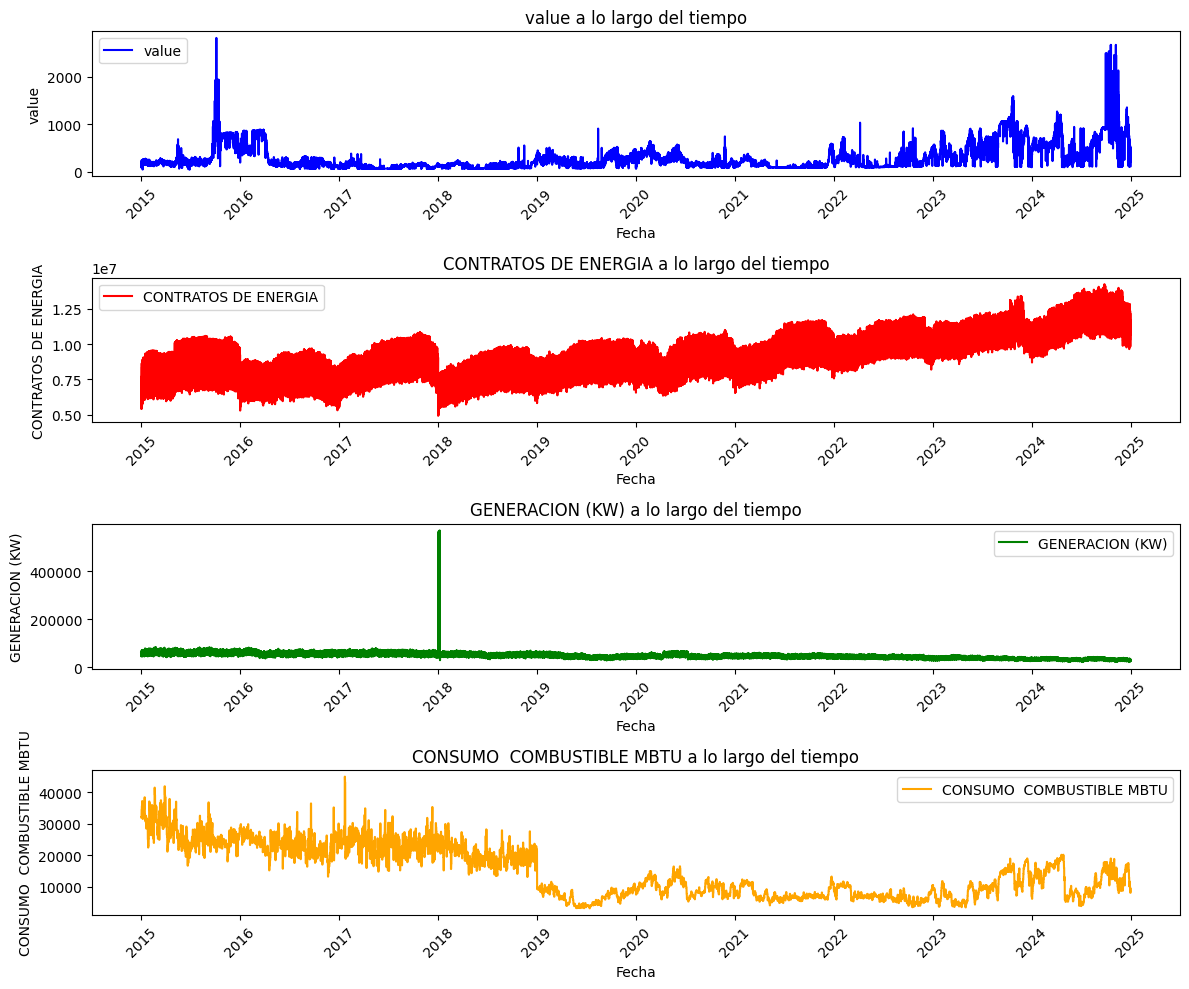

In [ ]:
import matplotlib.pyplot as plt  # Importa matplotlib.pyplot con el alias 'plt'
import seaborn as sns  # Importa seaborn con el alias 'sns'
import pandas as pd  # Asegúrate de que pandas esté importado

# Define a list of colors to use for the lines
colores = ['blue', 'red', 'green', 'orange', 'purple']  # Add more colors if needed

# Filter the data to include only dates between 2015-01-01 and 2024-12-31
fecha_inicio = pd.to_datetime('2015-01-01')
fecha_fin = pd.to_datetime('2024-12-31')
df_filtrado = df_final[(df_final['Datetime'] >= fecha_inicio) & (df_final['Datetime'] <= fecha_fin)]

# Create the line graph for each column in a single plot
plt.figure(figsize=(12, 10))

# Iterate over numeric columns in the DataFrame
for i, columna in enumerate(df_filtrado.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(len(df_filtrado.select_dtypes(include=['float64', 'int64']).columns), 1, i + 1)
    plt.plot(df_filtrado['Datetime'], df_filtrado[columna], color=colores[i % len(colores)], label=columna)
    plt.title(f'{columna} a lo largo del tiempo')
    plt.xlabel('Fecha')
    plt.ylabel(columna)
    plt.xticks(rotation=45)  # Rotate dates for readability
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Check if all columns have the same number of data points
data_counts = df_final.count()  # Get the count of non-null values for each column
print(data_counts)

# Check if all counts are equal
all_equal = data_counts.nunique() == 1  # nunique() returns the number of unique values

if all_equal:
    print("✅ Todas las columnas tienen el mismo número de datos.")
else:
    print("⚠️ Las columnas tienen diferente número de datos.")

Datetime                     87648
value                        87648
CONTRATOS DE ENERGIA         87648
GENERACION (KW)              87648
CONSUMO  COMBUSTIBLE MBTU    87648
dtype: int64
✅ Todas las columnas tienen el mismo número de datos.


In [ ]:
# Guardar el DataFrame final como un archivo Excel en Google Drive
ruta_guardado_excel = '/content/drive/MyDrive/Colab Notebooks/DATA_ENERGIAMULTIVARIABLE_FINAL.xlsx'
df_final.to_excel(ruta_guardado_excel, index=False)

# O guardarlo como un archivo CSV en Google Drive
ruta_guardado_csv = '/content/drive/MyDrive/Colab Notebooks/DATA_ENERGIAMULTIVARIABLE_FINAL.csv'
df_final.to_csv(ruta_guardado_csv, index=False)

print(f'Los datos se han guardado correctamente en: {ruta_guardado_excel} (Excel) o {ruta_guardado_csv} (CSV)')


Los datos se han guardado correctamente en: /content/drive/MyDrive/Colab Notebooks/DATA_ENERGIAMULTIVARIABLE_FINAL.xlsx (Excel) o /content/drive/MyDrive/Colab Notebooks/DATA_ENERGIAMULTIVARIABLE_FINAL.csv (CSV)
